In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import time

DOT_COLOR = 'deeppink'
PREDICTED_COLOR = 'black'

In [50]:
# Generate synthetic data

NOISE = 1.0
START = 0
END = 10

np.random.seed(int(time.time()))
X = np.sort(END * np.random.rand(80, 1), axis=0)
# function is y = sin(x) * x + noise
y = np.sin(X).ravel() * X.ravel() + np.random.normal(0, NOISE, X.shape[0])
# a function with increasing wave length
# y = np.sin(X).ravel() * X.ravel() + np.random.normal(0, NOISE, X.shape[0])
# a linear function with noise
#y = X.ravel() + np.random.normal(0, NOISE, X.shape[0])
# a quadratic function with noise
# y = X.ravel() ** 2 + np.random.normal(0, NOISE, X.shape[0])
# a cubic function with noise
# y = X.ravel() ** 3 + np.random.normal(0, NOISE, X.shape[0])
# an exponential function with noise
# y = np.exp(X.ravel()) + np.random.normal(0, NOISE, X.shape[0])

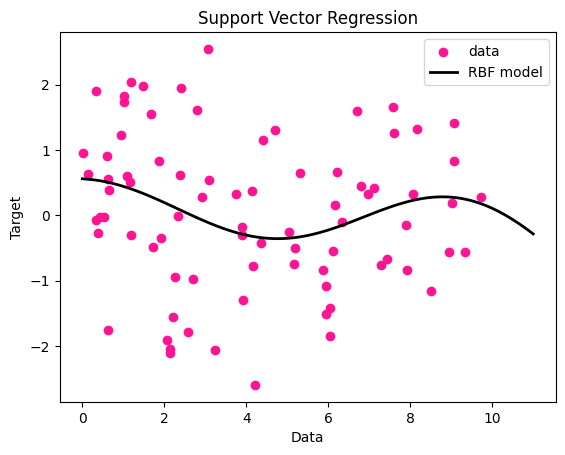

In [51]:
# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.025)
svr_rbf.fit(X, y)

# Predict on new data points
X_test = np.linspace(START, END*1.1, 100)[:, np.newaxis]
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.scatter(X, y, color=DOT_COLOR, label='data')
plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Mean Squared Error: 18765782.50877962
[0.03688744]
[73.55515111]


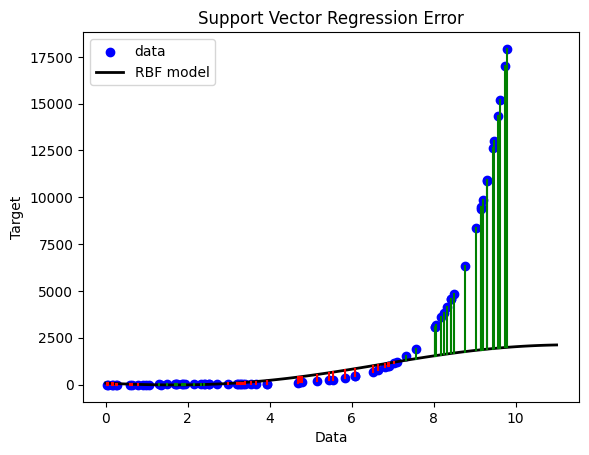

In [44]:
# Visualization of MSE (Mean Squared Error)
mse = np.mean((svr_rbf.predict(X) - y) ** 2)
print('Mean Squared Error:', mse)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.025)
svr_rbf.fit(X, y)

# Predict on new data points
X_test = np.linspace(START, END*1.1, 100)[:, np.newaxis]
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.scatter(X, y, color="blue", label='data')
plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='RBF model')
print(X[0])
print(svr_rbf.predict([X[0]]))

for i in range(len(X)):
    y_data = y[i]
    y_pred = svr_rbf.predict([X[i]])[0]
    if y_data < y_pred:
        plt.plot([X[i], X[i]], [y_data, y_pred], 'r-')
    else:
        plt.plot([X[i], X[i]], [y_data, y_pred], 'g-')
    
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression Error')
plt.legend()
plt.show()


Fitting SVR with kernel linear
Fitting took 0.0030019283294677734 seconds
Fitting SVR with kernel poly
Fitting took 0.0010001659393310547 seconds
Fitting SVR with kernel rbf
Fitting took 0.0015101432800292969 seconds
Fitting SVR with kernel sigmoid
Fitting took 0.0009984970092773438 seconds


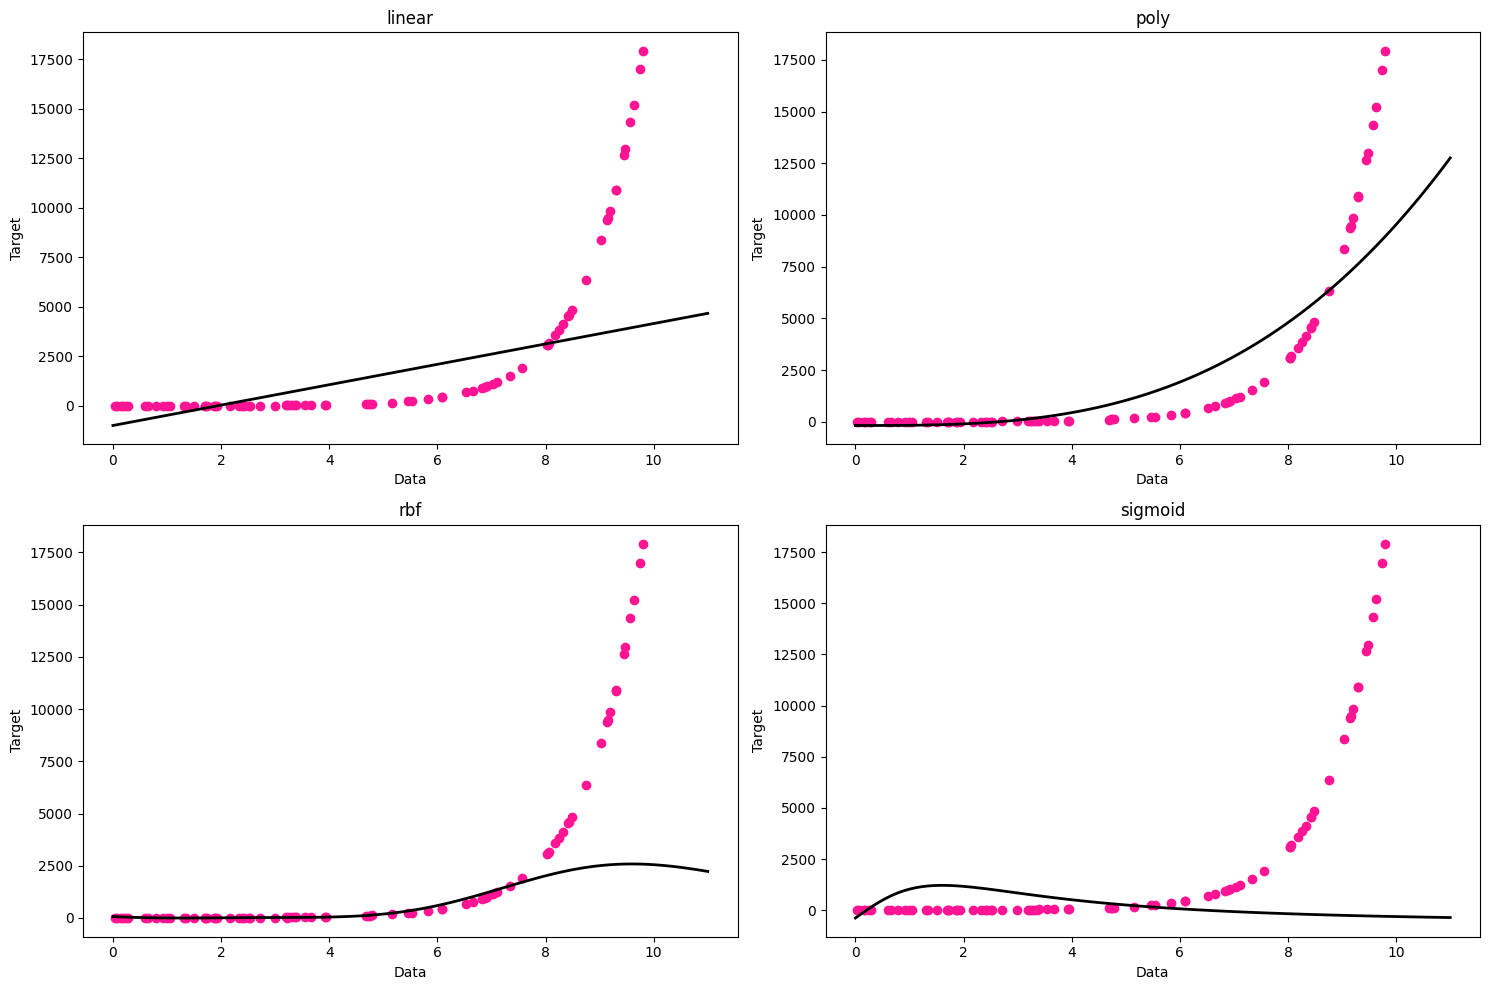

In [46]:
# Testing different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig = plt.figure(figsize=(15, 10))
for kernel in kernels:
    print(f'Fitting SVR with kernel {kernel}')
    start = time.time()
    svr = SVR(kernel=kernel, C=100, gamma=0.1)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 2, kernels.index(kernel) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(kernel)
    
plt.tight_layout()
plt.show()

Fitting SVR with C=0.1
Fitting took 0.0 seconds
Fitting SVR with C=1
Fitting took 0.0 seconds
Fitting SVR with C=50
Fitting took 0.0 seconds
Fitting SVR with C=100
Fitting took 0.0 seconds
Fitting SVR with C=500
Fitting took 0.0021009445190429688 seconds
Fitting SVR with C=1000
Fitting took 0.0 seconds


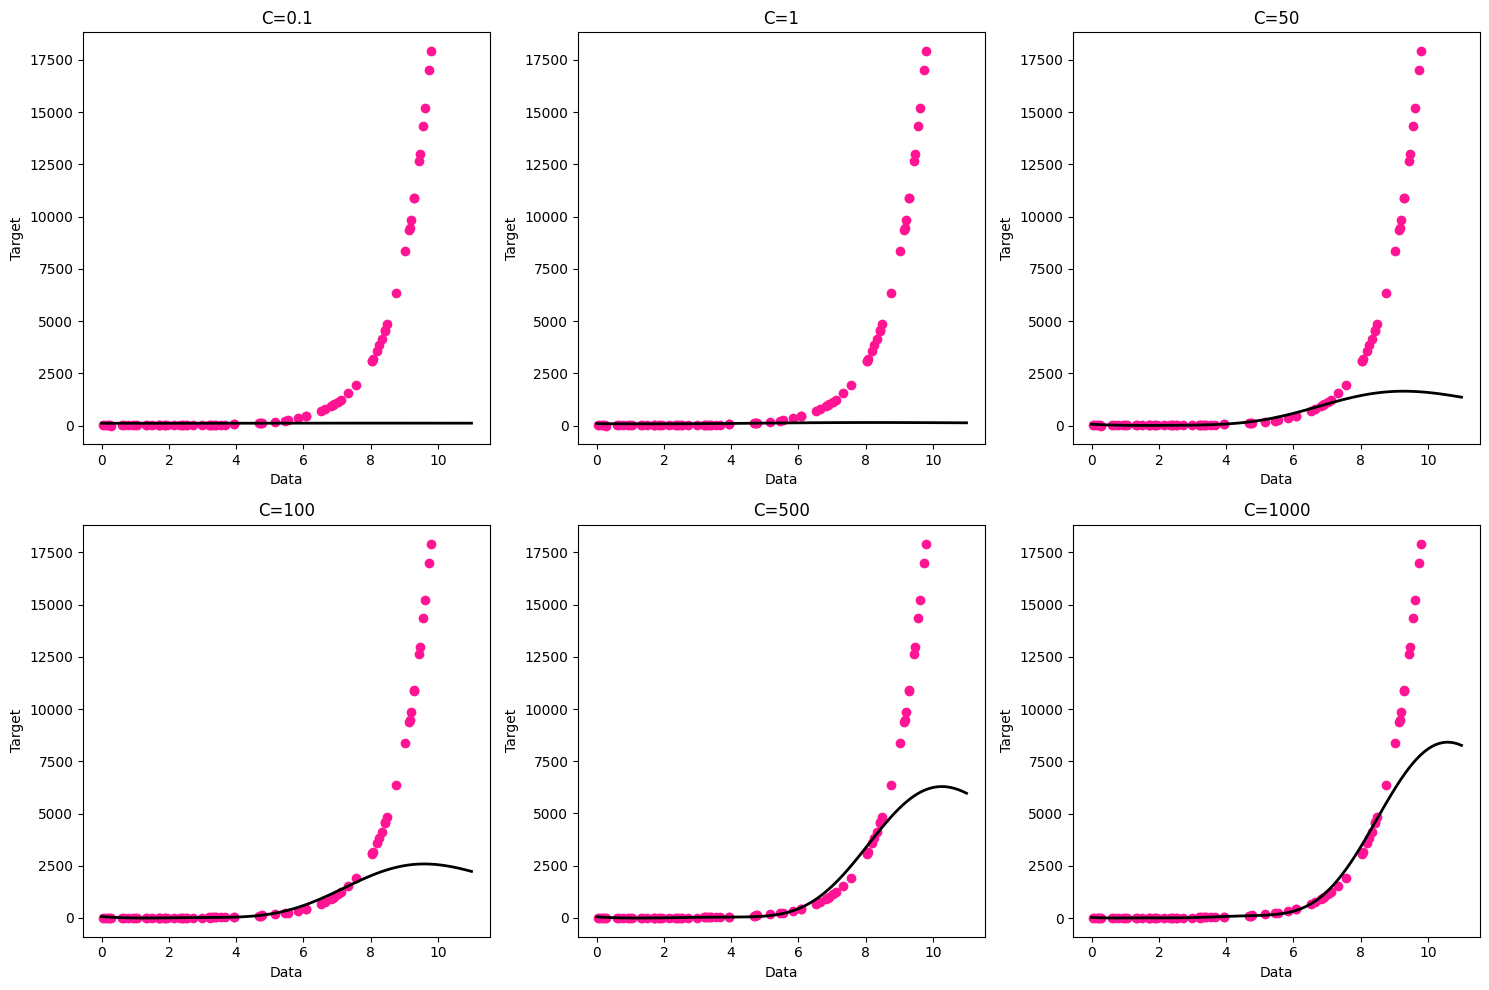

In [47]:
# Testing different C regularization parameters

C_values = [0.1, 1, 50, 100, 500, 1000]

fig = plt.figure(figsize=(15, 10))
for C in C_values:
    print(f'Fitting SVR with C={C}')
    start = time.time()
    svr = SVR(kernel='rbf', C=C, gamma=0.1)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 3, C_values.index(C) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(f'C={C}')

plt.tight_layout()
plt.show()

Fitting SVR with gamma=0.001
Fitting took 0.0 seconds
Fitting SVR with gamma=0.01
Fitting took 0.0 seconds
Fitting SVR with gamma=0.1
Fitting took 0.0009999275207519531 seconds
Fitting SVR with gamma=1
Fitting took 0.0015041828155517578 seconds
Fitting SVR with gamma=10
Fitting took 0.001995086669921875 seconds
Fitting SVR with gamma=100
Fitting took 0.0009999275207519531 seconds


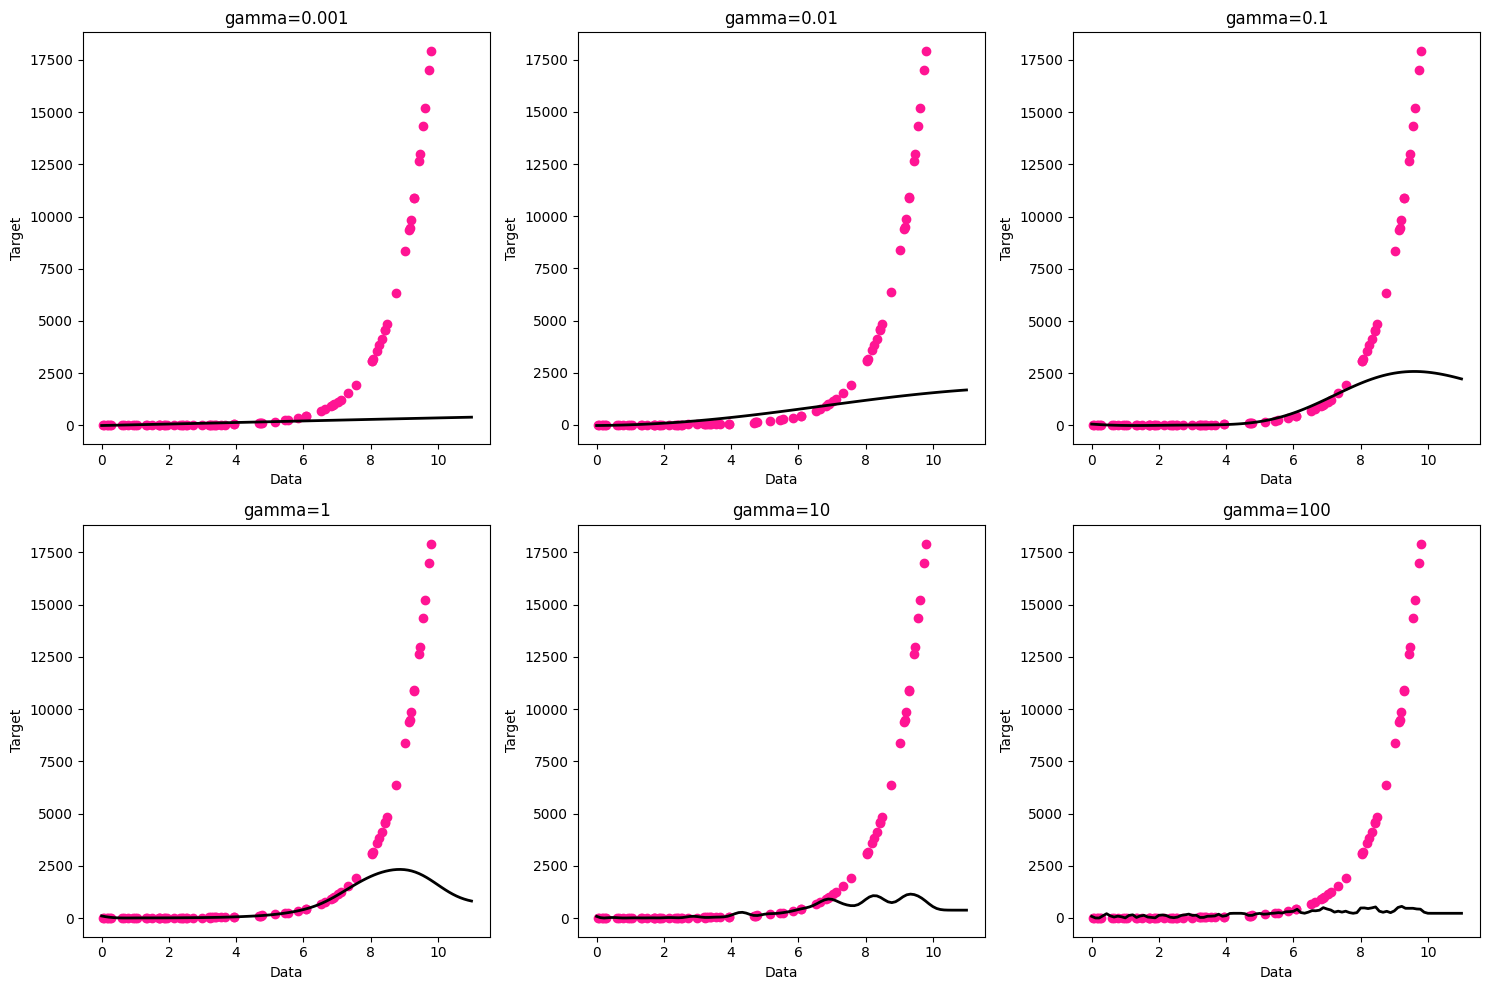

In [49]:
# Testing gammas, the kernel coefficient
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

fig = plt.figure(figsize=(15, 10))
for gamma in gamma_values:
    print(f'Fitting SVR with gamma={gamma}')
    start = time.time()
    svr = SVR(kernel='rbf', C=100, gamma=gamma)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 3, gamma_values.index(gamma) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(f'gamma={gamma}')

plt.tight_layout()
plt.show()